In [3]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading the data
social_data=pd.read_csv('/content/Social_Network_Ads (1).csv')
social_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


*Understanding* the data


In [5]:
social_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


No missing values,4 numeric columns and 1 object data types

In [6]:
#drop the user id and Gender
social_data.drop(['User ID','Gender'],axis=1,inplace=True)

In [7]:
social_data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [8]:
social_data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
social_data.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

Male-1,Female-0

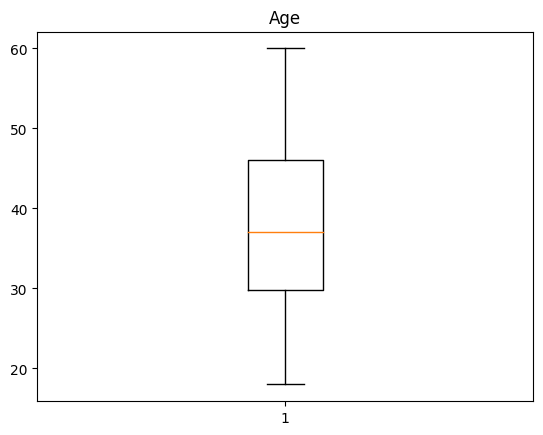

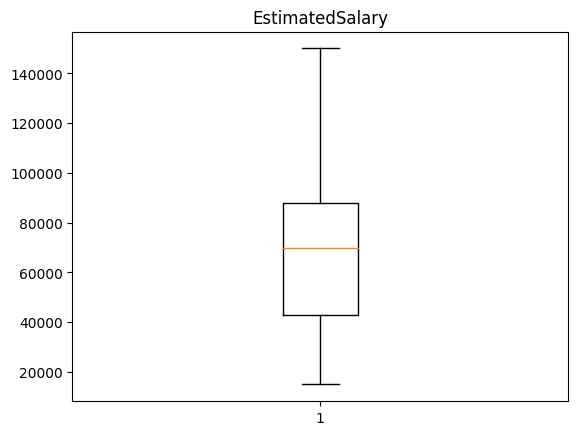

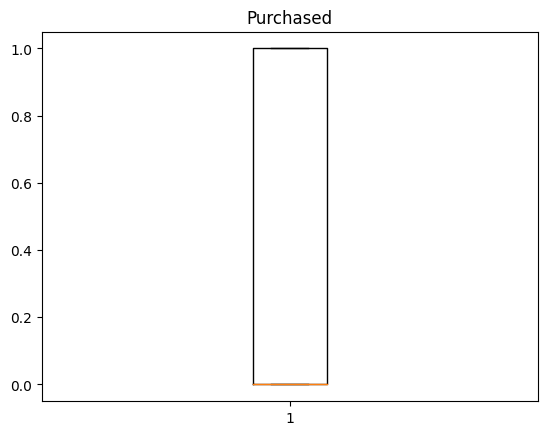

In [10]:
# Checking Outliers
num_cols=['Age', 'EstimatedSalary', 'Purchased']

for i in num_cols:
  plt.boxplot(social_data[i])
  plt.title(i)
  plt.show();

<Axes: >

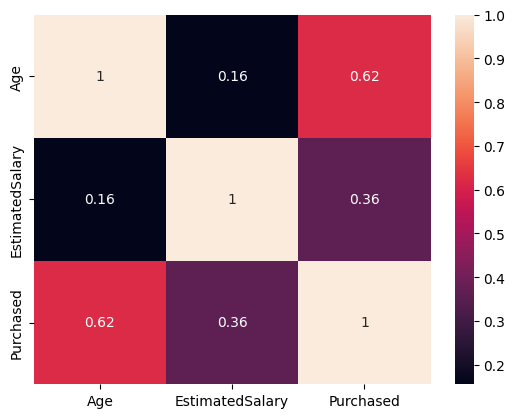

In [11]:
# Find the correlation of this dataset using a heatmap
sns.heatmap(social_data.corr(),annot=True)

In [12]:
#Splitting dependent and independent features
y = social_data['Purchased']
X = social_data.drop('Purchased', axis=1)

In [13]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [15]:
#splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)


LogisticRegression

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_log_pred=log_reg.predict(X_test)

In [17]:
y_log_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
confusion_matrix(y_test,y_log_pred)

array([[51,  0],
       [29,  0]])

In [19]:
acc_log=accuracy_score(y_test,y_log_pred)
print('Accuracy:',acc_log)
print('Precision:',precision_score(y_test,y_log_pred))
print('recall:',recall_score(y_test,y_log_pred))
print('F1:',f1_score(y_test,y_log_pred))

Accuracy: 0.6375
Precision: 0.0
recall: 0.0
F1: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*K*-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,15)

In [21]:
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
  classifier.fit(X_train,y_train)
  y_pred_knn=classifier.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred_knn)
  metric_k.append(accuracy)

Text(0, 0.5, 'accuracy')

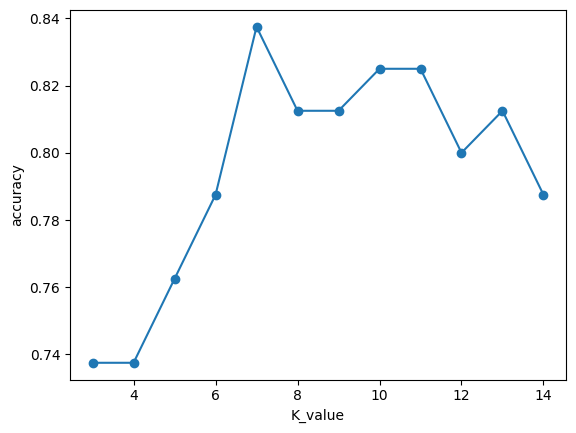

In [22]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K_value')
plt.ylabel('accuracy')

In [23]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
classifier.fit(X_train,y_train)
y_pred_knn=classifier.predict(X_test)


In [24]:
y_pred_knn

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [25]:
acc_knn=accuracy_score(y_test,y_pred_knn)
print('Accuracy:',acc_knn)
print('Precision:',precision_score(y_test,y_pred_knn))
print('recall:',recall_score(y_test,y_pred_knn))
print('F1:',f1_score(y_test,y_pred_knn))

Accuracy: 0.8375
Precision: 0.9444444444444444
recall: 0.5862068965517241
F1: 0.7234042553191489


SVM

In [26]:
from sklearn.svm import SVC
sv_cl=SVC(kernel='linear')
sv_cl.fit(X_train,y_train)
y_pred=sv_cl.predict(X_test)
acc_svm=accuracy_score(y_test,y_pred)
print('Accuracy is:',acc_svm)
print(confusion_matrix(y_test,y_pred))


Accuracy is: 0.7875
[[46  5]
 [12 17]]


Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train,y_train)
y_pred=dt_clf.predict(X_test)
acc_dt=accuracy_score(y_test,y_pred)
print('Accuracy is:',acc_dt)
print(confusion_matrix(y_test,y_pred))


Accuracy is: 0.8625
[[43  8]
 [ 3 26]]


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=3)
rf_clf.fit(X_train,y_train)
y_pred=rf_clf.predict(X_test)
acc_rf=accuracy_score(y_test,y_pred)
print('Accuracy is:',acc_rf)

Accuracy is: 0.8875


In [29]:
result=pd.DataFrame({'Model':['LOG','KNN','SVM','DT','RF'],'Accuracy':[acc_log,acc_knn,acc_svm,acc_dt,acc_rf]})

result.sort_values(by='Accuracy',ascending=False,inplace=True)



In [30]:
result.set_index('Model')


,Accuracy
Model,
RF,0.8875
DT,0.8625
KNN,0.8375
SVM,0.7875
LOG,0.6375


Random Forest is our best model

In [37]:
#prediction
prediction=rf_clf.predict([[19,19000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [38]:
prediction[0]

0

In [39]:
if prediction[0]==1:
  print("Purchased")
else:
  print("not Purchased")

not Purchased


In [34]:
import pickle
with open('model.pkl','wb') as model_file:
  pickle.dump(rf_clf,model_file)

In [35]:
!pip show scikit-learn


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
